In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sckit


In [4]:
gam=pd.read_csv('diabetes.csv')
gam.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = gam.drop("Glucose", axis=1).values
y = gam["Glucose"].values
print(type(X), type(y))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [7]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(768, 1)


In [8]:
# sns.heatmap(gam.corr())
# plt.ylabel("Blood Glucose (mg/dl)")
# plt.xlabel("Body Mass Index")


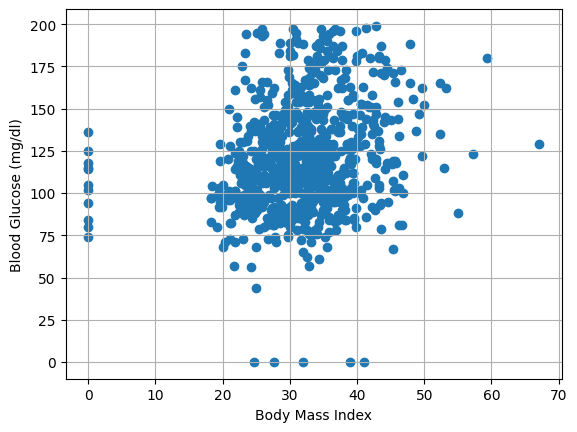

In [9]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.grid(True)
plt.show()


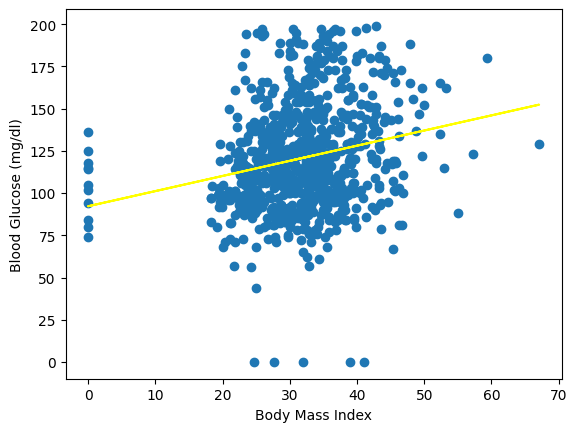

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions,color='yellow')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
reg.score(x_test,y_test)



0.2997416970153669

In [12]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(26.545738366329473)

In [13]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test,y_pred)

26.545738366329473

In [14]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
cv_results

array([0.26207548, 0.28228176, 0.41203082, 0.23785884, 0.41634629,
       0.30398869])